In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots




In [2]:
df = pd.read_csv(r"C:\Users\91879\Desktop\medium proj\amazon.csv")

In [4]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   int64  
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 460.9+ KB


In [11]:
df.sort_values(by="wilson_lower_bound", ascending = False)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109
...,...,...,...,...,...,...,...,...,...,...,...,...
1712,1712,G. Abbott,5,I use this in my Samsung Galaxy S5 to store my...,24-06-2014,167,0,0,0,0,0.000000,0.000000
1711,1711,G68,5,awesome! Worked well with the Surface 2 tablet...,04-08-2014,126,0,0,0,0,0.000000,0.000000
1710,1710,G0Horns!,4,Its amazing the amount of storage we are putti...,27-05-2013,560,0,0,0,0,0.000000,0.000000
1709,1709,g0estoeleven,3,This card does exactly what it should. Class-...,08-03-2013,640,0,0,0,0,0.000000,0.000000


In [14]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0]* 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis = 1, keys = ["Missing Values", "ratio"])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head =5, tail =5):
    print("SHAPE".center(82,'~'))
    print('Rows: {}'.format(df.shape[0]))
    print('columns:{}'.format(df.shape[1]))
    print("TYPES".center(82,'~'))
    print(df.dtypes)
    print("".center(82,'~'))
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83,'~'))
    print(df.duplicated().sum())
    print("QUANTITIES".center(82,'~'))
    print(df.quantile([0, 0.5, 0.50, 0.95, 0.99, 1]).T)
    
check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
columns:12
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unnamed: 0                int64
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing Values  ratio
reviewerName               1   0.02
reviewText                 1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTITIES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00    0.50    0.50         0.

C:\Users\91879\AppData\Local\Temp\ipykernel_19936\809926279.py:20: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [23]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns, 
                               'Classes': [dataframe[i].nunique() \
                                           for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending = False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

,Variable,Classes
0,Unnamed: 0,4915
1,reviewText,4912
2,reviewerName,4594
3,reviewTime,690
4,day_diff,690
5,wilson_lower_bound,40
6,score_average_rating,28
7,score_pos_neg_diff,27
8,total_vote,26
9,helpful_yes,23


In [54]:
constraints = ['#B34D22', '#EBE00C', '#1FEB0C', '#0C92EB', '#EB0CD5']
def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows = 1, cols =2,
                        subplot_titles=('Countplot', 'Percentage'),
                        specs=[[{"type": "xy"}, {'type':'domain'}]])
    
    fig.add_trace(go.Bar( y = df[column_name].value_counts().values.tolist(),
                          x = [str(i) for i in df[column_name].value_counts().index],
                          text = df[column_name].value_counts().values.tolist(),
                          textfont = dict(size=14),
                          name = column_name,
                          textposition = 'auto',
                          showlegend = False,
                          marker = dict(color = constraints,
                                        line = dict(color = '#DBE6EC',
                                                    width = 1))),
                  row = 1, col =1)
    fig.add_trace(go.Pie(labels = df[column_name].value_counts().keys(),
                         values = df[column_name].value_counts().values,
                         textfont = dict(size = 18),
                         textposition = 'auto',
                         showlegend = False,
                         name = column_name,
                         marker = dict(colors = constraints)),
                  row = 1, col = 2)
    fig.update_layout(title = {'text': column_name,
                               'y': 0.9,
                               'x': 0.5,
                               'xanchor':'center',
                               'yanchor':'top'},
                      template = 'plotly_white')
    iplot(fig)

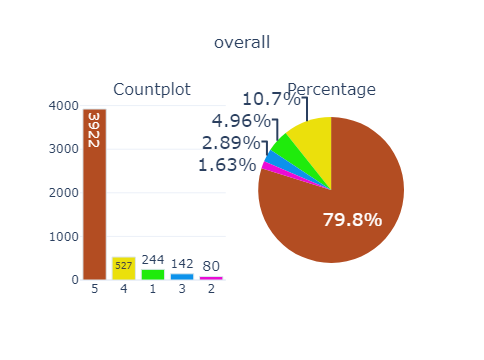

In [55]:
categorical_variable_summary(df, 'overall')

In [56]:
df.reviewText.head()

0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: reviewText, dtype: object

In [57]:
review_example = df.reviewText[2031]
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [58]:
review_example = re.sub("[^a-zA-Z]", '',review_example)
review_example

'UPDATESomylovelywifeboughtmeaSamsungGalaxyTabforFathersDayandIvebeenlovingiteversinceJustasotherwithSamsungproductstheGalaxyTabhastheabilitytoaddamicroSDcardtoexpandthememoryonthedeviceSinceitsbeenoverayearIdecidedtodosomemoreresearchtoseeifSanDiskofferedanythingnewAsoftheirproductlineupformicroSDcardsfromworsttobestperformancewisearetheasfollowsSanDiskSanDiskUltraSanDiskUltraPLUSSanDiskExtremeSanDiskExtremePLUSSanDiskExtremePRONowthedifferencebetweenallofthesecardsaresimplythespeedinwhichyoucanreadwritedatatothecardYesthepublishedratingofmostallthesecardsexcepttheSanDiskregularareClassUHSIbutthatsjustaratingActualrealworldperformancedoesgetbetterwitheachmodelbutwithfastercardscomemoreexpensivepricesSinceAmazondoesntcarrytheUltraPLUSmodelofmicroSDcardIhadtododirectcomparisonsbetweentheSanDiskUltraExtremeandExtremePLUSAsmentionedinmyearlierreviewIpurchasedtheSanDiskUltraformyGalaxySMyquestionwasdidIwanttopayovermoreforacardthatisfasterthantheoneIalreadyownedOrIcouldpayalmostdoubletoget

In [59]:
review_example = review_example.lower().split()

In [60]:
review_example

['updatesomylovelywifeboughtmeasamsunggalaxytabforfathersdayandivebeenlovingiteversincejustasotherwithsamsungproductsthegalaxytabhastheabilitytoaddamicrosdcardtoexpandthememoryonthedevicesinceitsbeenoverayearidecidedtodosomemoreresearchtoseeifsandiskofferedanythingnewasoftheirproductlineupformicrosdcardsfromworsttobestperformancewisearetheasfollowssandisksandiskultrasandiskultraplussandiskextremesandiskextremeplussandiskextremepronowthedifferencebetweenallofthesecardsaresimplythespeedinwhichyoucanreadwritedatatothecardyesthepublishedratingofmostallthesecardsexceptthesandiskregularareclassuhsibutthatsjustaratingactualrealworldperformancedoesgetbetterwitheachmodelbutwithfastercardscomemoreexpensivepricessinceamazondoesntcarrytheultraplusmodelofmicrosdcardihadtododirectcomparisonsbetweenthesandiskultraextremeandextremeplusasmentionedinmyearlierreviewipurchasedthesandiskultraformygalaxysmyquestionwasdidiwanttopayovermoreforacardthatisfasterthantheoneialreadyownedoricouldpayalmostdoubletoge

In [61]:
rt = lambda x: re.sub("[^a-zA-Z]", ' ',str(x))
df["reviewText"] = df["reviewText"].map(rt)
df["reviewText"] = df["reviewText"].str.lower()
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,no issues,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,purchased this for my device it worked as adv...,25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected i should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,this think has worked out great had a diff br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,bought it with retail packaging arrived legit...,13-07-2013,513,0,0,0,0,0.0,0.0


In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

for index, row in df['reviewText'].iteritems():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg>pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "Neutral"
                                                          
                                                          
                                                                                

C:\Users\91879\AppData\Local\Temp\ipykernel_19936\3006738370.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [66]:
df[df["sentiment"] == "Positive"].sort_values("wilson_lower_bound", ascending=False).head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


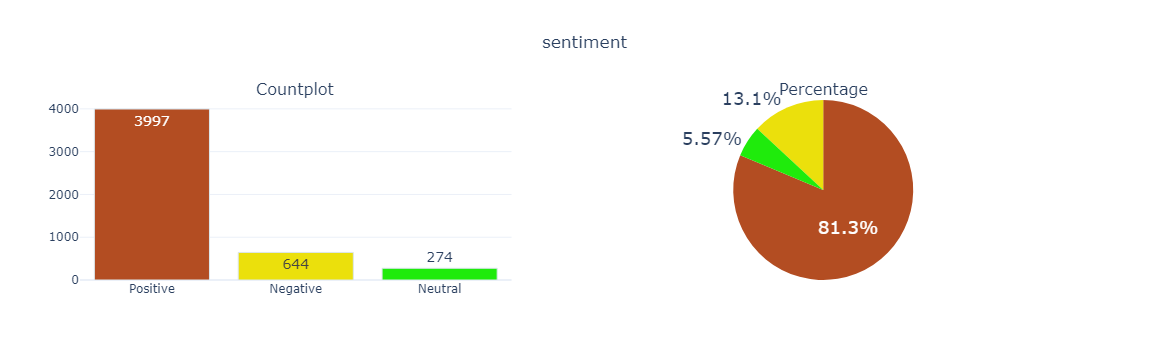

In [68]:
categorical_variable_summary(df, 'sentiment')